In [38]:
import pandas as pd
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

# Estadistica 

(Sobre la nueva base de datos)

In [39]:

file_path = path.join('..', 'data', 'masked','new_achs_accidents_data.csv')
df = pd.read_csv(file_path)

df.head()

,id_siniestro,tipo_siniestro,numero_paciente,texto,poblacion,ocupacion,edad,sexo,relato_admision,mecanismo,fecha_creacion
0,7242104,2,1007054764,"INGRESA DEAMBULANDO POR SUS PROPIOS MEDIOS, SI...",CHONCHI,Operario,22.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA EN LA GARITA E...,12.10,2022-01-03
1,7242107,2,1007001523,FRACTURA 5TO MTC DERECHO,QUILICURA,supervisor,29.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA CAMINO A MI TR...,12.10,2022-01-03
2,7242197,1,1007055069,CLOTE; GCS 15\nMarcha claudicante moderada\nEE...,ISLA DE MAIPO,MANTENCION,46.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA SACANDO CUCHIL...,91.20,2022-01-03
3,7242333,1,1003302110,"\nKETOROLACO 10 MG (A), ORAL, 10 MG, C/8 HRS ,...",TALCAHUANO,MECANICO,42.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA COMPRANDO REPU...,91.15,2022-01-03
4,7243063,1,1003972578,ALTA EN EL DIA POR ACHS\nLM TIPO 1 POR 11 DIAS...,PUERTO MONTT,CAJERA,49.0,femenino,AL MOMENTO DEL ACCIDENTE ESTABA ESPERANDO LOCO...,12.10,2022-01-03


In [40]:
df.columns

Index(['id_siniestro', 'tipo_siniestro', 'numero_paciente', 'texto',
       'poblacion', 'ocupacion', 'edad', 'sexo', 'relato_admision',
       'mecanismo', 'fecha_creacion'],
      dtype='object')

In [41]:
df.dtypes

id_siniestro         int64
tipo_siniestro       int64
numero_paciente      int64
texto               object
poblacion           object
ocupacion           object
edad               float64
sexo                object
relato_admision     object
mecanismo          float64
fecha_creacion      object
dtype: object

In [42]:
df[df['edad'].isna()]

,id_siniestro,tipo_siniestro,numero_paciente,texto,poblacion,ocupacion,edad,sexo,relato_admision,mecanismo,fecha_creacion
104864,7815399,2,1007426012,control,FREIRE,tecnico en parvulos,NaN,femenino,AL MOMENTO DEL ACCIDENTE ESTABA EN TRAYECTO DE...,12.1,2023-06-12
188456,7402780,1,1005292880,\nANALGESIA\nFRIO LOCAL\nCONTROL SOS,TOCOPILLA,AUXILIAR DE SERVICIO,NaN,femenino,AL MOMENTO DEL ACCIDENTE ESTABA TRASLADANDO CA...,23.1,2022-05-30
229314,7346075,1,1003130544,Am. NO \nmed: no \nAlergias: no \n\nPsicóloga ...,LOS ANGELES,psicologa,NaN,femenino,AL MOMENTO DEL ACCIDENTE ESTABA CAMINADO A MI ...,12.1,2022-04-06


In [43]:
df['fecha_creacion']= pd.to_datetime(df['fecha_creacion'])

In [44]:
df.dtypes

id_siniestro                int64
tipo_siniestro              int64
numero_paciente             int64
texto                      object
poblacion                  object
ocupacion                  object
edad                      float64
sexo                       object
relato_admision            object
mecanismo                 float64
fecha_creacion     datetime64[ns]
dtype: object

In [45]:
df.describe()

,id_siniestro,tipo_siniestro,numero_paciente,edad,mecanismo,fecha_creacion
count,3.420170e+05,342017.000000,3.420170e+05,342014.000000,342017.000000,342017
mean,7.640698e+06,1.237453,1.005006e+09,41.453426,55.385415,2023-01-03 09:41:36.539060736
min,4.533661e+06,1.000000,1.000000e+09,0.000000,11.100000,2022-01-01 00:00:00
25%,7.445258e+06,1.000000,1.003079e+09,31.000000,12.100000,2022-07-07 00:00:00
50%,7.644475e+06,1.000000,1.005682e+09,39.000000,54.100000,2023-01-04 00:00:00
75%,7.832455e+06,1.000000,1.007152e+09,52.000000,91.200000,2023-06-28 00:00:00
max,8.036353e+06,2.000000,1.007563e+09,124.000000,92.200000,2023-12-31 00:00:00
std,2.247997e+05,0.425523,2.266830e+06,13.239644,34.432197,NaN


Cantidad de accidentes registrados en 2022 y 2023 = 342017


Cantida de accidentes registrados en 2022 = 

Cantida de accidentes registrados en 2023 = 

Tenemos pacientes con edades entre 0 y 2 años

In [46]:
df[df['edad']<=17].describe()

,id_siniestro,tipo_siniestro,numero_paciente,edad,mecanismo,fecha_creacion
count,1.240000e+02,124.000000,1.240000e+02,124.000000,124.000000,124
mean,7.608301e+06,1.322581,1.006066e+09,2.903226,59.472097,2022-12-01 21:05:48.387096832
min,7.242784e+06,1.000000,1.000400e+09,0.000000,11.200000,2022-01-03 00:00:00
25%,7.386166e+06,1.000000,1.005220e+09,1.000000,23.100000,2022-05-14 12:00:00
50%,7.623447e+06,1.000000,1.007104e+09,1.000000,81.400000,2022-12-06 00:00:00
75%,7.806387e+06,2.000000,1.007332e+09,3.000000,91.200000,2023-06-02 00:00:00
max,8.014277e+06,2.000000,1.007540e+09,17.000000,92.200000,2023-12-14 00:00:00
std,2.363324e+05,0.469360,1.877006e+06,3.740396,34.412115,NaN


Tenemos casos de accidetes de pacientes de mas de 100 años

In [47]:
df[df['edad']>90].describe()


,id_siniestro,tipo_siniestro,numero_paciente,edad,mecanismo,fecha_creacion
count,2.300000e+01,23.000000,2.300000e+01,23.000000,23.000000,23
mean,7.597190e+06,1.260870,1.003689e+09,109.000000,47.955217,2022-11-24 11:28:41.739130368
min,7.242799e+06,1.000000,1.000075e+09,91.000000,11.100000,2022-01-03 00:00:00
25%,7.459288e+06,1.000000,1.002843e+09,92.000000,12.100000,2022-07-20 00:00:00
50%,7.565755e+06,1.000000,1.002983e+09,120.000000,34.100000,2022-10-25 00:00:00
75%,7.797788e+06,1.500000,1.004814e+09,123.500000,91.155000,2023-05-26 12:00:00
max,7.976649e+06,2.000000,1.007332e+09,124.000000,92.200000,2023-11-14 00:00:00
std,2.278605e+05,0.448978,1.924911e+06,15.285168,35.543577,NaN


<Axes: >

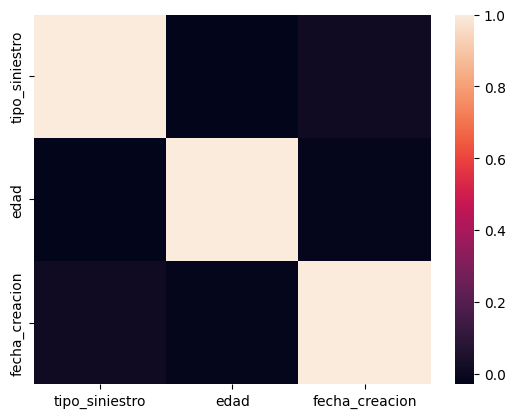

In [48]:
df_subset= df[[ 'tipo_siniestro', 
         'edad',
        'fecha_creacion']]

sns.heatmap(df_subset.corr())

## Tipo de siniestro

<Axes: xlabel='tipo_siniestro', ylabel='count'>

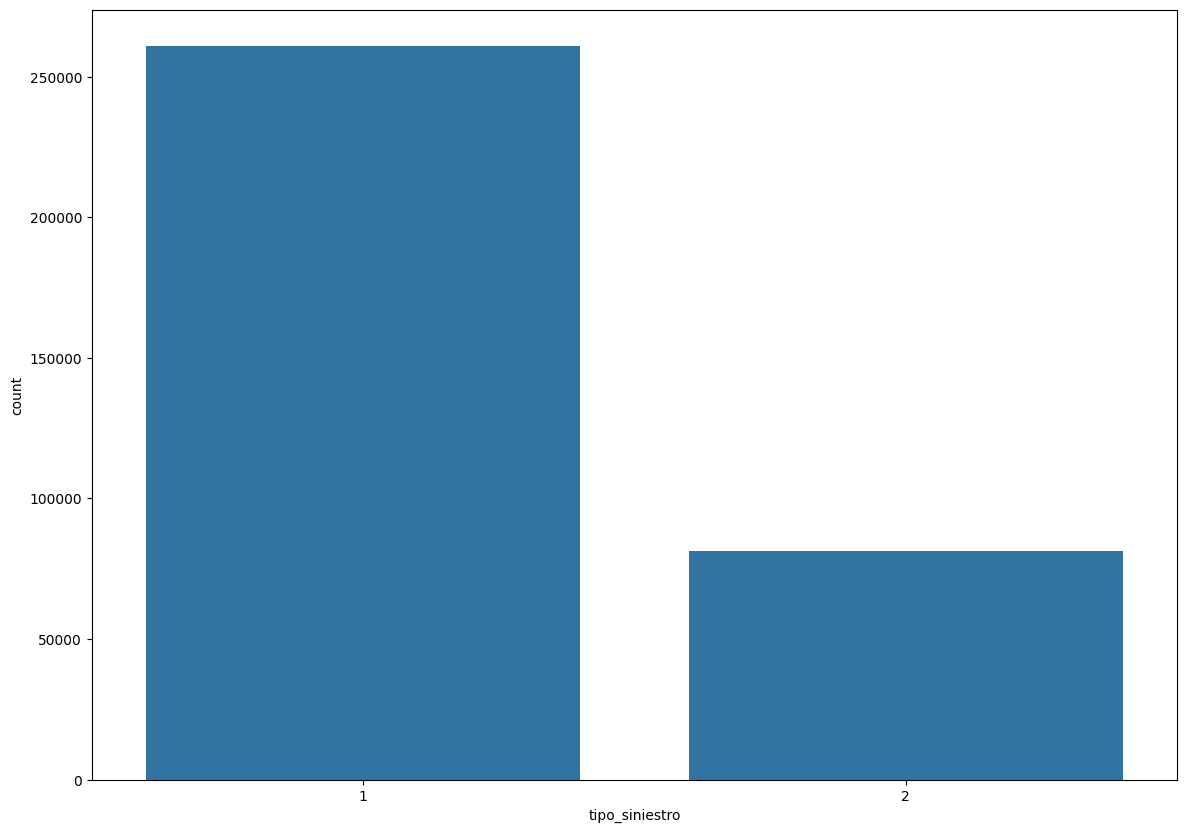

In [49]:
plt.figure(figsize=(14, 10))
graf = df.groupby(['tipo_siniestro']).size().reset_index(name='count')
sns.barplot(y='count', x='tipo_siniestro', data= graf)

## Población

In [50]:
poblacion_unica= df['poblacion'].unique()

len(poblacion_unica)


363

https://github.com/knxroot/bdcut-cl/blob/master/BD/CSV_utf8/BDCUT_CL__CSV_UTF8.csv

In [51]:
poblacion_unica

array(['CHONCHI', 'QUILICURA', 'ISLA DE MAIPO', 'TALCAHUANO',
       'PUERTO MONTT', 'TALCA', 'PROVIDENCIA', 'VIÑA DEL MAR',
       'LOS ANGELES', 'CALERA', 'MAIPU', 'COQUIMBO', 'ALTO HOSPICIO',
       'PUDAHUEL', 'CHIMBARONGO', 'SAN JAVIER', 'RECOLETA', 'COLINA',
       'MONTE PATRIA', 'PEUMO', 'VALLENAR', 'CONCEPCION',
       'SAN PEDRO DE LA PAZ', 'LA CISTERNA', 'CHILLÁN', 'CURARREHUE',
       'LA FLORIDA', 'CALERA DE TANGO', 'TOME', 'PIRQUE', 'PAILLACO',
       'LA PINTANA', 'MAULLIN', 'ANGOL', 'LA SERENA', 'TIERRA AMARILLA',
       'LINARES', 'LAMPA', 'SAN FELIPE', 'VITACURA', 'AISEN', 'BUIN',
       'RENCA', 'LA GRANJA', 'LAJA', 'REQUINOA', 'PLACILLA', 'SANTIAGO',
       'ÑUÑOA', 'RANCAGUA', 'OVALLE', 'LAS CONDES', 'CERRILLOS',
       'PADRE LAS CASAS', 'PADRE HURTADO', 'ESTACION CENTRAL',
       'LO BARNECHEA', 'QUILPUE', 'FLORIDA', 'SAN BERNARDO', 'ARICA',
       'FUTRONO', 'SAN ANTONIO', 'IQUIQUE', 'VALPARAISO', 'TEMUCO',
       'LAUTARO', 'LO PRADO', 'CHAÑARAL', 'INDEPENDENCI

### Distribucion de accidentes por comuna

<Axes: xlabel='poblacion', ylabel='count'>

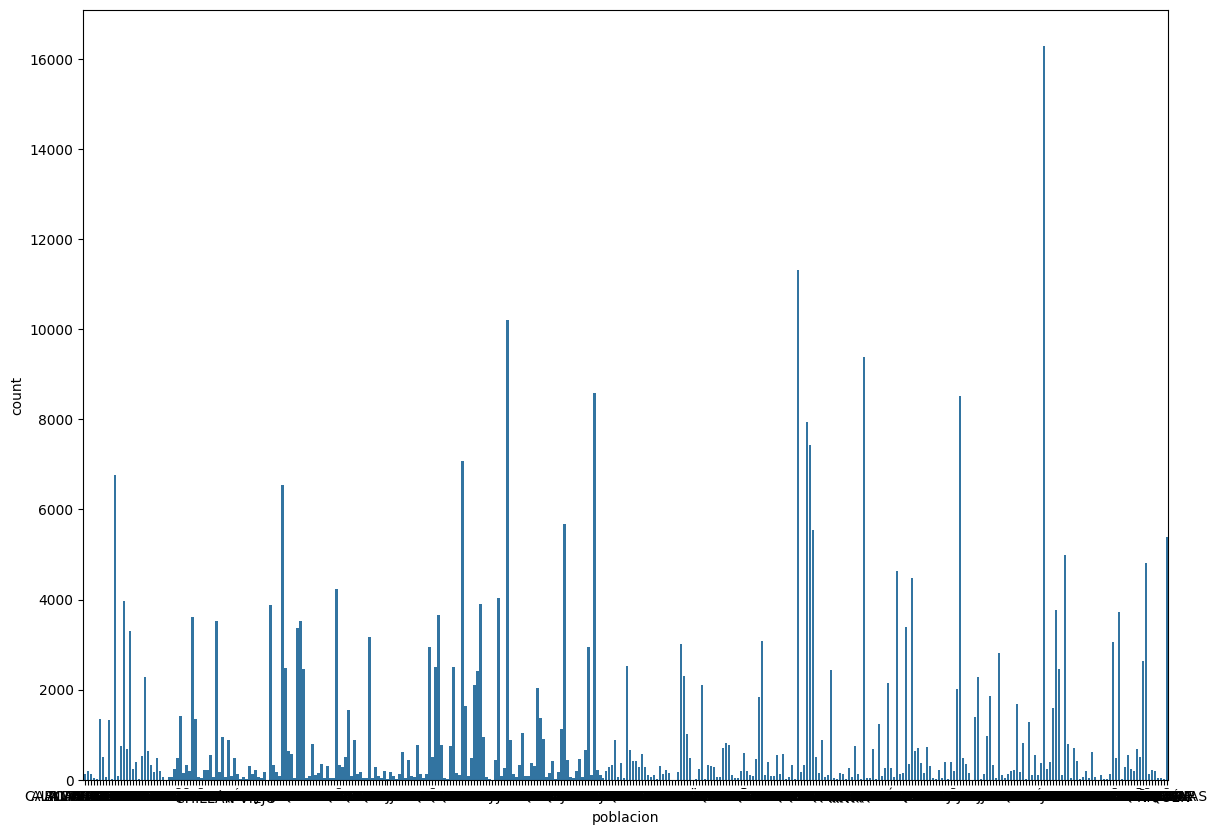

In [52]:
plt.figure(figsize=(14, 10))
graf = df.groupby(['poblacion']).size().reset_index(name='count')
sns.barplot(y='count', x='poblacion', data= graf)

### Distribucion de accidentes por región 

In [53]:

file_path = path.join('..', 'data', 'masked','BDCUT_CL__CSV_UTF8.csv')
region_comuna = pd.read_csv(file_path)
region_comuna['COMUNA_NOMBRE']=region_comuna['COMUNA_NOMBRE'].str.upper()
region_comuna['PROVINCIA_NOMBRE']=region_comuna['PROVINCIA_NOMBRE'].str.upper()
region_comuna['REGION_NOMBRE']= region_comuna['REGION_NOMBRE'].str.upper()
region_comuna.head()

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\masked\\BDCUT_CL__CSV_UTF8.csv'

In [ ]:
comunas_accidentes= df[['poblacion', 'tipo_siniestro']]
comunas_accidentes.rename(columns={"poblacion": "PROVINCIA_NOMBRE"})
comunas_accidentes.columns
#comunas_region_accidentes= comunas_accidentes.merge(region_comuna, on='PROVINCIA_NOMBRE')

#comunas_region_accidentes



Index(['poblacion', 'tipo_siniestro'], dtype='object')

## Edad

<Axes: xlabel='edad', ylabel='count'>

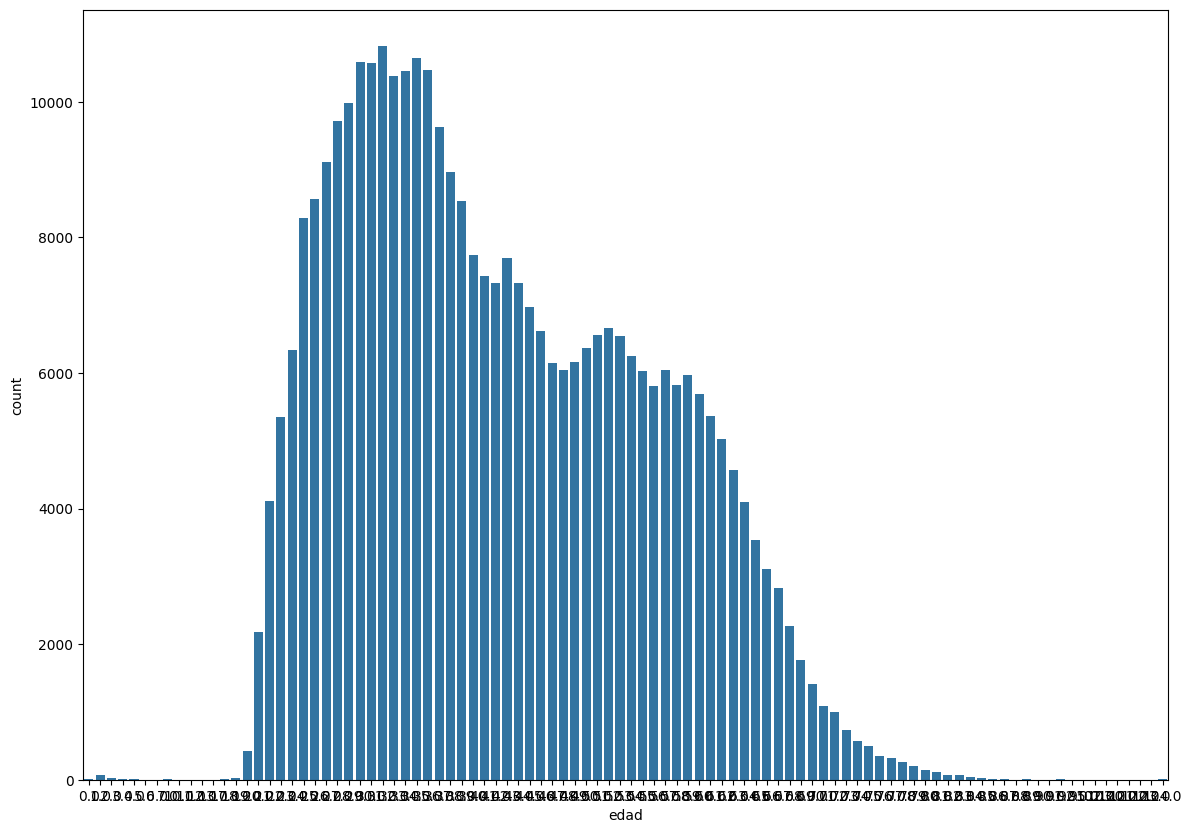

In [ ]:
plt.figure(figsize=(14, 10))
graf = df.groupby(['edad']).size().reset_index(name='count')
sns.barplot(y='count', x='edad', data= graf)

In [ ]:
df['edad'].describe()

count    342014.000000
mean         41.453426
std          13.239644
min           0.000000
25%          31.000000
50%          39.000000
75%          52.000000
max         124.000000
Name: edad, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\3351018141.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['edad'], shade=True)


<Axes: xlabel='edad', ylabel='Density'>

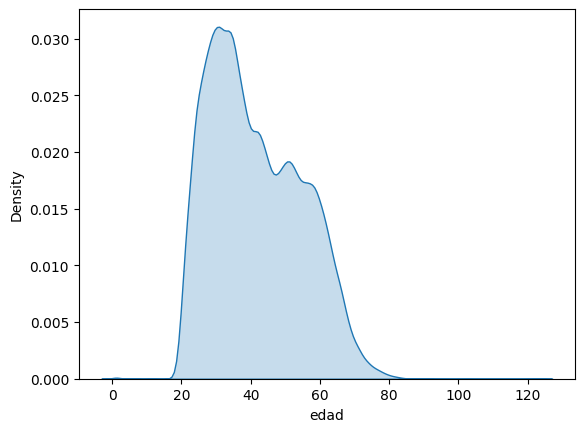

In [ ]:
sns.kdeplot(data=df['edad'], shade=True)

<Axes: xlabel='edad', ylabel='Count'>

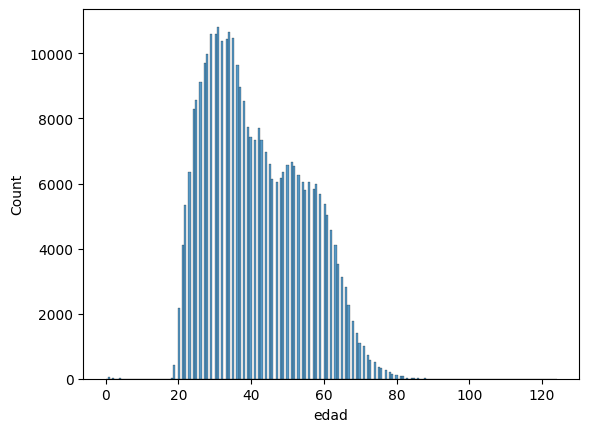

In [ ]:
sns.histplot(
    data=df,
    x='edad',stat='count'
)

In [ ]:
freq = df.edad.value_counts(normalize = True).reset_index().sort_values(by='edad')
print(freq)

     edad  proportion
74    0.0    0.000015
64    1.0    0.000187
68    2.0    0.000064
78    3.0    0.000012
69    4.0    0.000029
..    ...         ...
92  120.0    0.000003
90  121.0    0.000003
88  122.0    0.000003
80  123.0    0.000009
73  124.0    0.000018

[96 rows x 2 columns]


<Axes: xlabel='edad', ylabel='Proportion'>

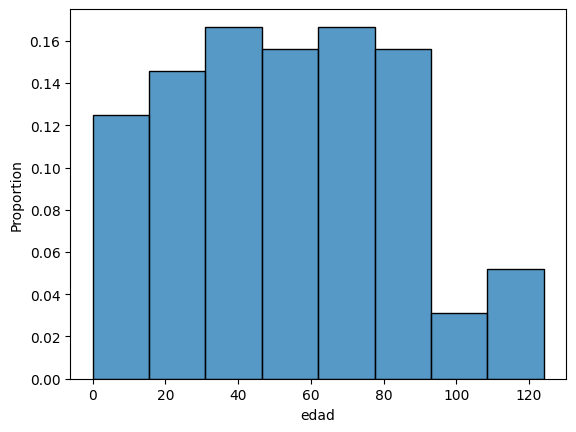

In [ ]:
sns.histplot(
    data=freq,
    x='edad',stat='proportion'
)

<Axes: xlabel='sexo', ylabel='edad'>

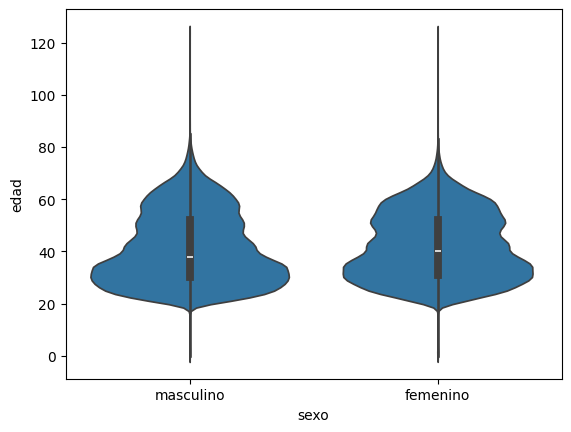

In [ ]:
sns.violinplot(data=df, x='sexo', y='edad')

In [ ]:
df['edad'].describe()

count    342014.000000
mean         41.453426
std          13.239644
min           0.000000
25%          31.000000
50%          39.000000
75%          52.000000
max         124.000000
Name: edad, dtype: float64

In [ ]:
df[df['sexo']=='masculino']['edad'].describe()

count    191301.000000
mean         41.095844
std          13.619605
min           0.000000
25%          30.000000
50%          38.000000
75%          52.000000
max         124.000000
Name: edad, dtype: float64

In [ ]:
df[df['sexo']=='femenino']['edad'].describe()

count    150711.000000
mean         41.907299
std          12.726694
min           0.000000
25%          31.000000
50%          40.000000
75%          52.000000
max         124.000000
Name: edad, dtype: float64

## Sexo


In [ ]:
df['sexo'].describe()

count        342015
unique            2
top       masculino
freq         191301
Name: sexo, dtype: object

In [ ]:
df[df['sexo']=='masculino' & df['']=='masculino'  ]

Necesitamos el total de los hombres y mujeres inscritos en la ACHS

## Fecha creación

In [54]:
df_colum_year= df.copy()
df_colum_year['year']= df['fecha_creacion'].dt.year
df_colum_year['year']=df_colum_year['year'].astype(str)
df_colum_year['day_number']= df['fecha_creacion'].dt.day_of_year
df_colum_year['month']= df['fecha_creacion'].dt.month
df_colum_year['day_of_week'] = df_colum_year['fecha_creacion'].dt.day_name()
df_colum_year['year'].describe()

count     342017
unique         2
top         2023
freq      172192
Name: year, dtype: object

C:\Users\DELL\AppData\Local\Temp\ipykernel_22908\591309889.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['fecha_creacion'], shade=True)


<Axes: xlabel='fecha_creacion', ylabel='Density'>

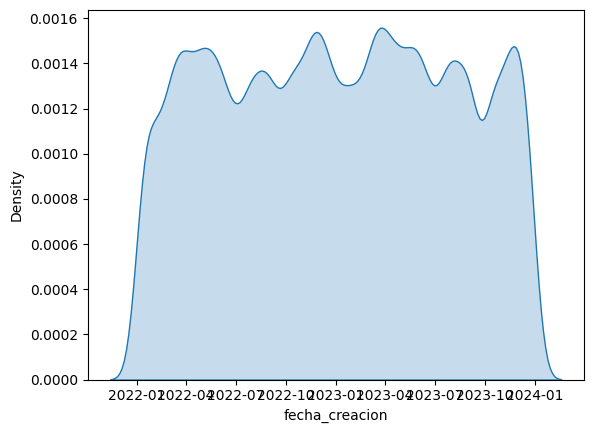

In [55]:
sns.kdeplot(data=df['fecha_creacion'], shade=True)


### 2022

C:\Users\DELL\AppData\Local\Temp\ipykernel_22908\2418537663.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fecha_creacion'].dt.year==2022]['fecha_creacion'], shade=True)


<Axes: xlabel='fecha_creacion', ylabel='Density'>

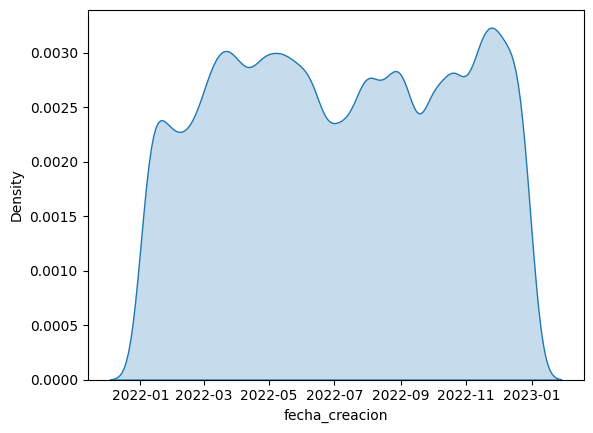

In [56]:
sns.kdeplot(data=df[df['fecha_creacion'].dt.year==2022]['fecha_creacion'], shade=True)


In [57]:
df[df['fecha_creacion'].dt.year==2022].count()

id_siniestro       169825
tipo_siniestro     169825
numero_paciente    169825
texto              169804
poblacion          169820
ocupacion          169825
edad               169823
sexo               169823
relato_admision    169823
mecanismo          169825
fecha_creacion     169825
dtype: int64

### 2023

C:\Users\DELL\AppData\Local\Temp\ipykernel_22908\1921696858.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['fecha_creacion'].dt.year==2023]['fecha_creacion'], shade=True)


<Axes: xlabel='fecha_creacion', ylabel='Density'>

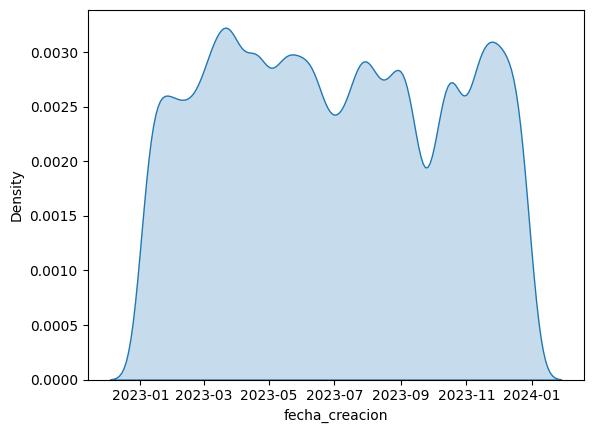

In [58]:
sns.kdeplot(data=df[df['fecha_creacion'].dt.year==2023]['fecha_creacion'], shade=True)

In [59]:
df[df['fecha_creacion'].dt.year==2023].count()

id_siniestro       172192
tipo_siniestro     172192
numero_paciente    172192
texto              172160
poblacion          172187
ocupacion          172192
edad               172191
sexo               172192
relato_admision    172190
mecanismo          172192
fecha_creacion     172192
dtype: int64

In [60]:
#freq_2023 = ((df[df['fecha_creacion'].dt.year==2023].fecha_creacion.dt.month.value_counts(normalize = True).reset_index().sort_values(by='fecha_creacion').proportion)*100).tolist()

#freq_2023

### 2022 v/s 2023

@Rocioldg
 va a juntar ambos años y va a calcular el promedio de accidentes mensuales y ver como cada mes se comporta en comparacion con ese promedio (por ej, dic es x% sobre la media)

<Axes: xlabel='fecha_creacion', ylabel='Density'>

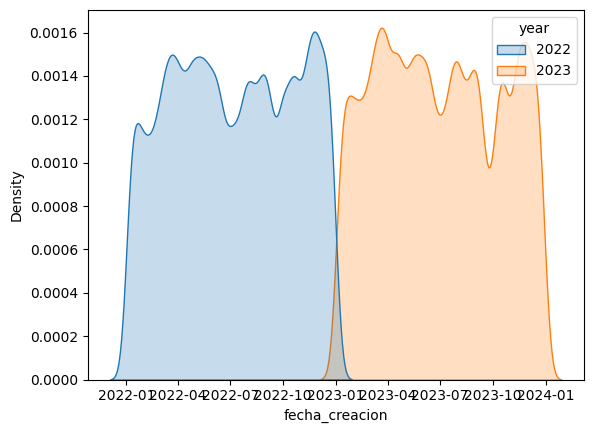

In [61]:
sns.kdeplot(data=df_colum_year,x= 'fecha_creacion', hue="year", fill=True)

<Axes: xlabel='day_number', ylabel='Density'>

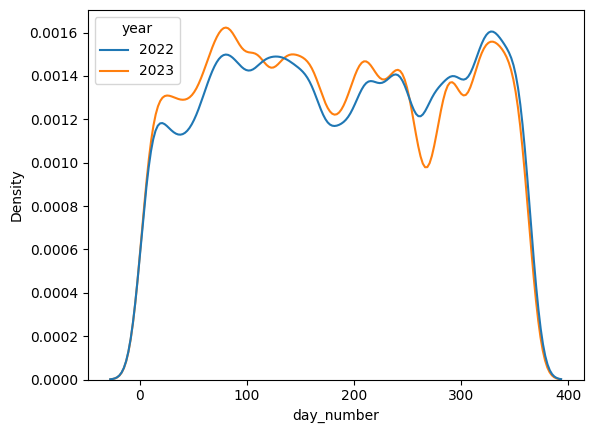

In [62]:
sns.kdeplot(data=df_colum_year, x= 'day_number', hue="year")

<Axes: xlabel='day_number', ylabel='Count'>

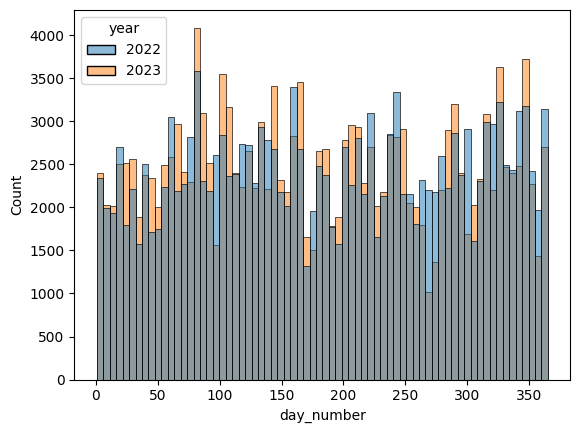

In [63]:
sns.histplot(data=df_colum_year, x= 'day_number', hue="year")

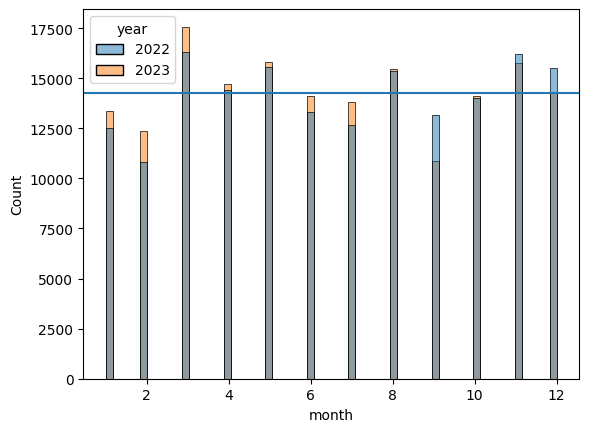

In [64]:
ax= sns.histplot(data=df_colum_year, x= 'month', hue="year")
ax.axhline(y = 14250.708333333334,    # Línea en y = 0.2
           xmin = 0, # 10%
           xmax = 12)

## Diferencias de genero en las fechas de creacion

<Axes: xlabel='fecha_creacion', ylabel='Density'>

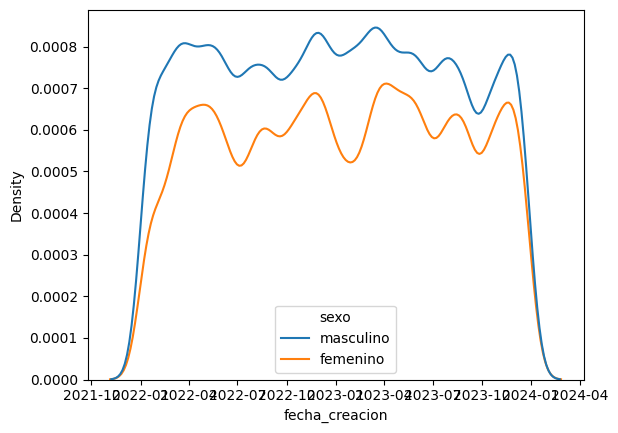

In [ ]:
sns.kdeplot(data=df_colum_year,x= 'fecha_creacion', hue="sexo")

<Axes: xlabel='fecha_creacion', ylabel='Count'>

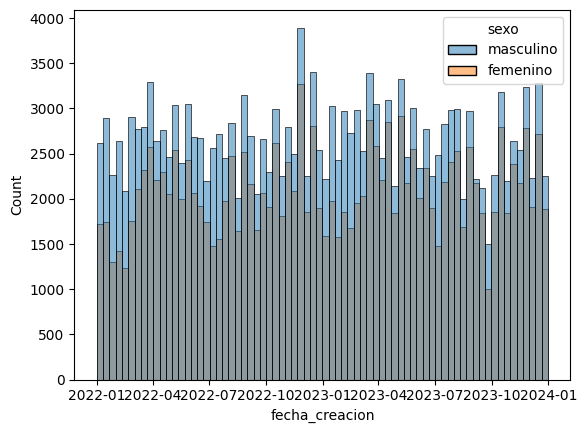

In [ ]:
sns.histplot(data=df_colum_year, x= 'fecha_creacion', hue="sexo")

### Promedio de accidnetes por mes

Promedio de accidentes mensuales de 2023

In [ ]:
df_colum_year[df_colum_year['year']=='2023'].groupby(['month']).count()['id_siniestro'].mean()

14349.333333333334

Promedio de accidentes mensuales 2022

In [ ]:
df_colum_year[df_colum_year['year']=='2022'].groupby(['month']).count()['id_siniestro'].mean()

14152.083333333334

Promedio de los accidentes que ocurrieron tomando en cuenta que son 24 meses de registro

In [ ]:
df_colum_year.groupby(['month']).count()['id_siniestro'].sum()/24

14250.708333333334

Promedio de accidentes diarios

In [66]:
prom_diario= 342017/(365*2)

Comparacion de al distribucion de los accidentes comparado al promedio de los accidentes mensuales

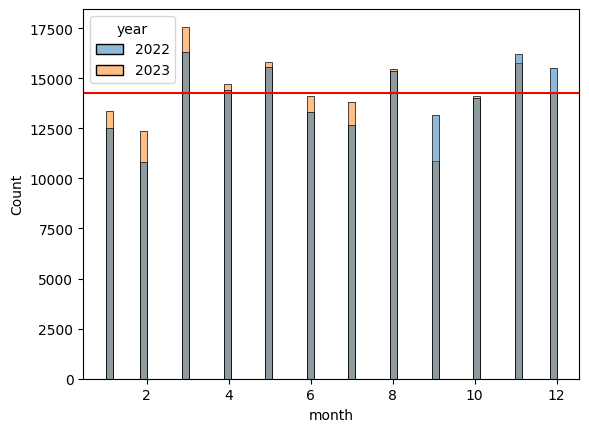

In [ ]:
ax= sns.histplot(data=df_colum_year, x= 'month', hue="year")
ax.axhline(y = 14250.708333333334,    # Línea en y = 0.2
           xmin = 0, # 10%
           xmax = 12, color='r')

In [65]:
df_colum_year['month_name']= df_colum_year['fecha_creacion'].dt.month_name()

C:\Users\DELL\AppData\Local\Temp\ipykernel_22908\3753676504.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

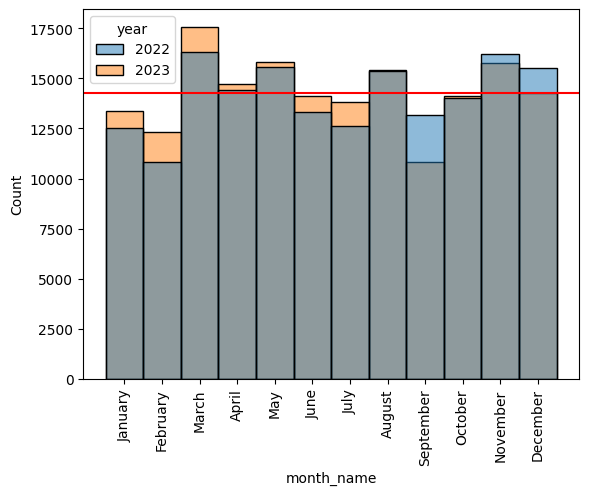

In [68]:
ax= sns.histplot(data=df_colum_year, x= 'month_name', hue="year")
ax.axhline(y = 14250.708333333334,    # Línea en y = 0.2
           xmin = 0, # 10%
           xmax = 12, color='r')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Comparacion de accidentes promedios diarios de el mes de enero 2022

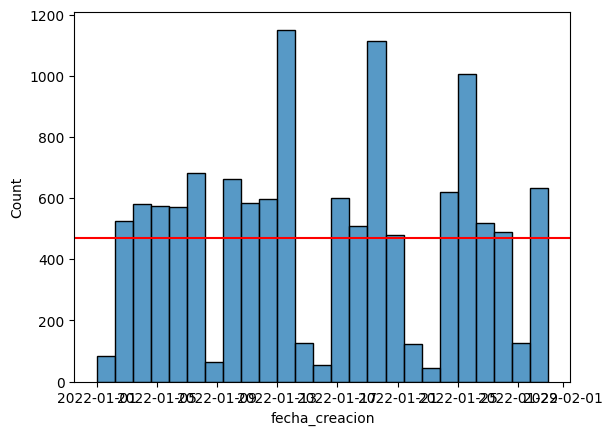

In [ ]:
ax= sns.histplot(data=df_colum_year[(df_colum_year['month']==1) & (df_colum_year['year']=='2022')],x='fecha_creacion')
ax.axhline(y = prom_diario,    # Línea en y = 0.2
           xmin = 0, # 10%
           xmax = 12, color='r')

Comparacion de accidentes promedios diarios de el mes de marzo

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\3235217672.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(19052.0, 0, '2022-03-01'),
 Text(19056.0, 0, '2022-03-05'),
 Text(19060.0, 0, '2022-03-09'),
 Text(19064.0, 0, '2022-03-13'),
 Text(19068.0, 0, '2022-03-17'),
 Text(19072.0, 0, '2022-03-21'),
 Text(19076.0, 0, '2022-03-25'),
 Text(19080.0, 0, '2022-03-29'),
 Text(19083.0, 0, '2022-04-01')]

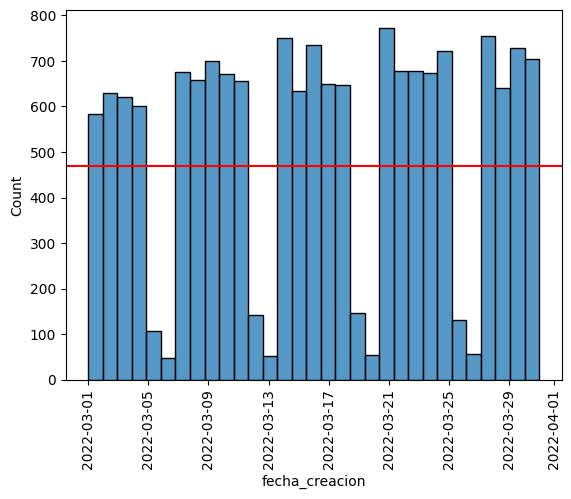

In [ ]:
ax= sns.histplot(data=df_colum_year[(df_colum_year['month']==3) & (df_colum_year['year']=='2022')],x='fecha_creacion', bins=31)
ax.axhline(y = prom_diario,    # Línea en y = 0.2
           xmin = 0, # 10%
           xmax = 12, color='r')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Comparacion de accidentes promedios diarios de el mes de septiembre

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\3077800707.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(19236.0, 0, '2022-09-01'),
 Text(19240.0, 0, '2022-09-05'),
 Text(19244.0, 0, '2022-09-09'),
 Text(19248.0, 0, '2022-09-13'),
 Text(19252.0, 0, '2022-09-17'),
 Text(19256.0, 0, '2022-09-21'),
 Text(19260.0, 0, '2022-09-25'),
 Text(19264.0, 0, '2022-09-29'),
 Text(19266.0, 0, '2022-10-01')]

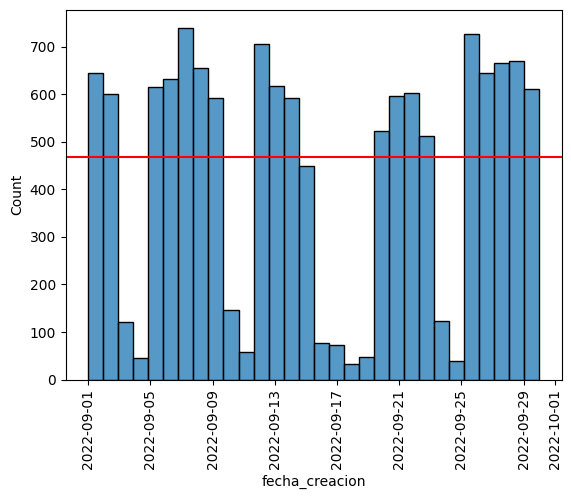

In [ ]:
ax= sns.histplot(data=df_colum_year[(df_colum_year['month']==9) & (df_colum_year['year']=='2022')],x='fecha_creacion', bins=30 )
ax.axhline(y = prom_diario,    # Línea en y = 0.2
           xmin = 0, # 10%
           xmax = 12, color='r')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Analisis por dia de semana

In [ ]:
days= df_colum_year['fecha_creacion'].dt.day_name()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\2345812701.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

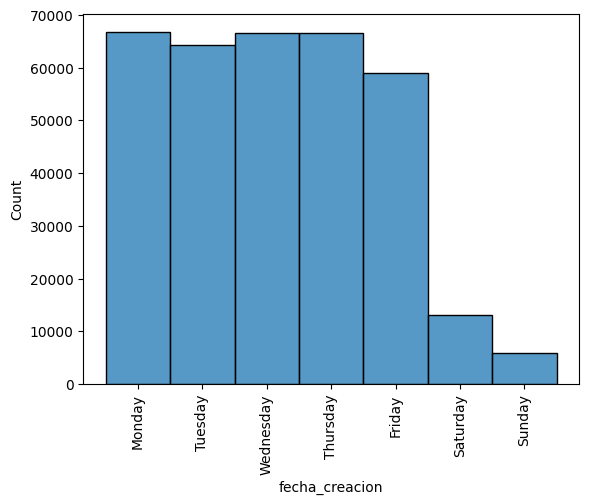

In [ ]:
ax= sns.histplot(days)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Analisis por mes

In [ ]:
df_colum_year['month_day'] = df_colum_year['fecha_creacion'].dt.strftime('%m-%d')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\1711508210.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['month_day'] = df_2022['fecha_creacion'].dt.strftime('%m-%d')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\1711508210.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['month_day'] = df_2023['fecha_creacion'].dt.strftime('%m-%d')


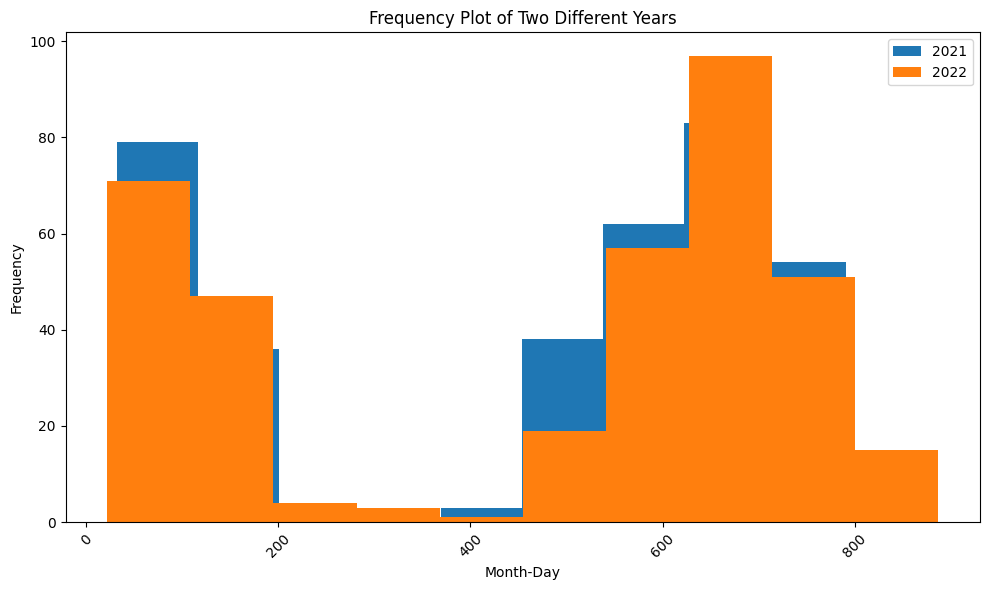

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter data by year
df_2022 = df_colum_year[df_colum_year['fecha_creacion'].dt.year == 2022]
df_2023 = df_colum_year[df_colum_year['fecha_creacion'].dt.year == 2023]

# Extract month and day for plotting
df_2022['month_day'] = df_2022['fecha_creacion'].dt.strftime('%m-%d')
df_2023['month_day'] = df_2023['fecha_creacion'].dt.strftime('%m-%d')

frequency1 = df_2022['month_day'].value_counts()
frequency2 = df_2023['month_day'].value_counts()

# Plot the frequency
plt.figure(figsize=(10, 6))
plt.hist(frequency1, label='2021')
plt.hist(frequency2, label='2022')
plt.xticks(rotation=45)
plt.xlabel('Month-Day')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Two Different Years')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
a=frequency1.index
b=frequency1.values

# Mecanismos

## general

In [73]:
file_path = path.join('..', 'data', 'masked','dicc_mecanismo_new_refined2.2.csv')
df_dicc = pd.read_csv(file_path, sep=';')

df_dicc.head()

,desc_subforma,Codigo SUSESO 2018,DETALLE MECANISMO LESIONAL
0,CAIDAS,11.1,Caida a distinto nivel - Desde alturas >= 1.8 ...
1,CAIDAS,11.2,Caida a distinto nivel - Desde alturas < 1.8 m...
2,CAIDAS,11.3,Caida a distinto nivel - Profundidad
3,CAIDAS,12.1,Caidas a un mismo nivel
4,GOLPES,21.1,Golpeado por objetos de Derrumbe (Ej.Caidas de...


In [74]:
df_dicc= df_dicc.rename(columns={"Codigo SUSESO 2018": "mecanismo"})

In [75]:
df_mecanismos = pd.merge(df, df_dicc, on= 'mecanismo')
df_mecanismos_time = pd.merge(df_colum_year,df_dicc, on='mecanismo')

C:\Users\DELL\AppData\Local\Temp\ipykernel_22908\1995063678.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'EXPLOSIONES O INCENDIOS'),
 Text(1, 0, 'INTOXICACION ALIMENTARIA'),
 Text(2, 0, 'FUERZA EXCESIVA'),
 Text(3, 0, 'CONTACTO CON CORRIENTE ELECTRICA'),
 Text(4, 0, 'INCIDENTE SIN LESION SEGUN RELATO PACIENTE'),
 Text(5, 0, 'PICADURAS DE INSECTOS'),
 Text(6, 0, 'AGRESIONES DE ANIMALES'),
 Text(7, 0, 'PROYECCION DE PARTICULAS'),
 Text(8, 0, 'CONTACTO CON CALOR O FRIO EXTREMO'),
 Text(9, 0, 'PISADAS'),
 Text(10, 0, 'CONTACTO O INHALACION DE SUSTANCIAS QUIMICAS, BIOLOGICAS O RADIACIONES '),
 Text(11, 0, 'FALSOS MOVIMIENTOS Y SOBREESFUERZO'),
 Text(12, 0, 'ATRAPAMIENTOS'),
 Text(13, 0, 'AMENZAS O AGRESIONES DE PERSONAS'),
 Text(14, 0, 'OTRAS FORMAS DE ACCIDENTE'),
 Text(15, 0, 'ACCIDENTES QUE INVOLUCRAN VEHICULOS'),
 Text(16, 0, 'GOLPES'),
 Text(17, 0, 'CONTACTO CON OBJETOS CORTO-PUNZANTES'),
 Text(18, 0, 'CAIDAS')]

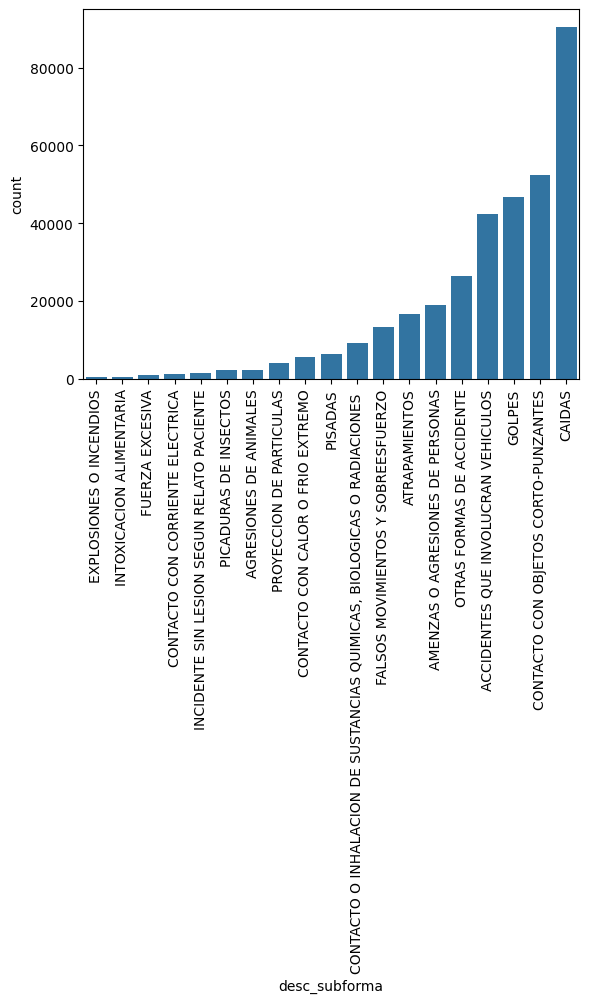

In [76]:
graf_2 = df_mecanismos.groupby(['desc_subforma']).size().reset_index(name='count').sort_values('count')
ax= sns.barplot(y='count', x='desc_subforma', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


### Temporal

¿Cuando ocurrieron los 5 accidentes mas fecuentes?

por semana?

que dia?

que mes?

Caidas

Dias

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\271298952.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '2023-05-18'),
 Text(1, 0, '2023-05-05'),
 Text(2, 0, '2023-09-18'),
 Text(3, 0, '2022-12-25'),
 Text(4, 0, '2022-01-02'),
 Text(5, 0, '2023-04-16'),
 Text(6, 0, '2023-12-24'),
 Text(7, 0, '2022-05-01'),
 Text(8, 0, '2022-05-15'),
 Text(9, 0, '2022-02-13')]

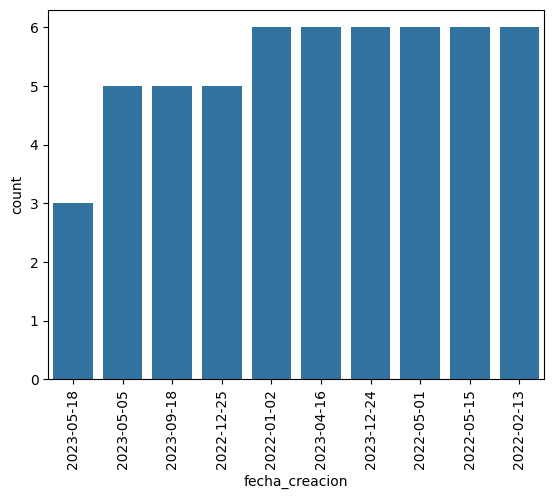

In [ ]:
graf_2 = df_mecanismos[df_mecanismos['desc_subforma']=='CAIDAS'].groupby(['fecha_creacion']).size().reset_index(name='count').sort_values('count').head(10)
ax= sns.barplot(y='count', x='fecha_creacion', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Mes

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\202879944.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '9'),
 Text(8, 0, '10'),
 Text(9, 0, '12')]

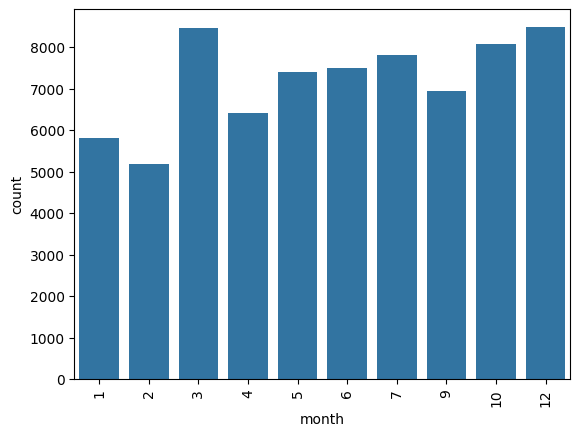

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CAIDAS'].groupby(['month']).size().reset_index(name='count').sort_values('count').head(10)
ax= sns.barplot(y='count', x='month', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Dia de la semana

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\1248346637.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Sunday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

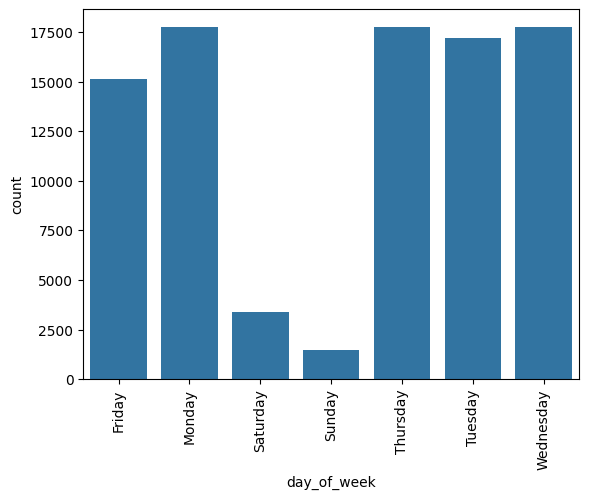

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CAIDAS'].groupby(['day_of_week']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='day_of_week', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Contacto con objetos corto-punzantes

Dias

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\3421882677.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '2023-05-18'),
 Text(1, 0, '2023-10-29'),
 Text(2, 0, '2022-09-11'),
 Text(3, 0, '2023-05-05'),
 Text(4, 0, '2023-05-07'),
 Text(5, 0, '2022-04-16'),
 Text(6, 0, '2022-11-06'),
 Text(7, 0, '2022-03-06'),
 Text(8, 0, '2022-01-02'),
 Text(9, 0, '2023-12-25')]

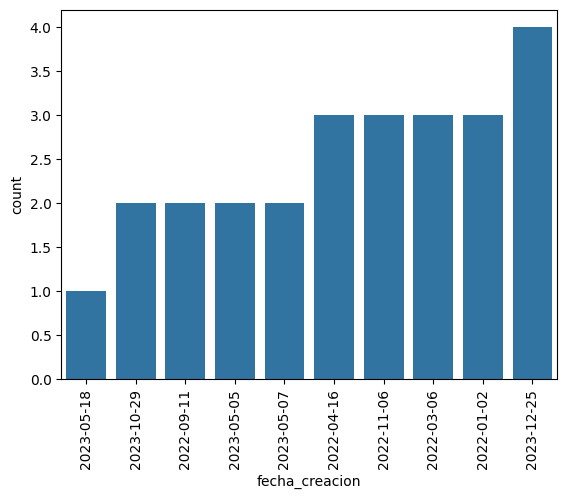

In [ ]:
graf_2 = df_mecanismos[df_mecanismos['desc_subforma']=='CONTACTO CON OBJETOS CORTO-PUNZANTES'].groupby(['fecha_creacion']).size().reset_index(name='count').sort_values('count').head(10)
ax= sns.barplot(y='count', x='fecha_creacion', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Mes

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\2122187754.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '4'),
 Text(3, 0, '6'),
 Text(4, 0, '7'),
 Text(5, 0, '8'),
 Text(6, 0, '9'),
 Text(7, 0, '10'),
 Text(8, 0, '11'),
 Text(9, 0, '12')]

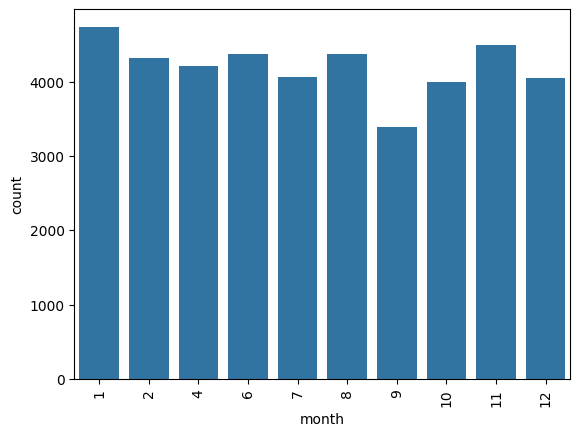

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CONTACTO CON OBJETOS CORTO-PUNZANTES'].groupby(['month']).size().reset_index(name='count').sort_values('count').head(10)
ax= sns.barplot(y='count', x='month', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

dia de la semana

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\2591067241.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Sunday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Tuesday'),
 Text(6, 0, 'Wednesday')]

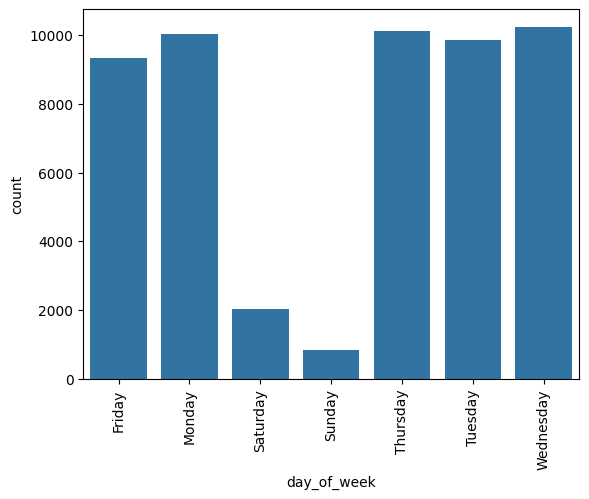

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CONTACTO CON OBJETOS CORTO-PUNZANTES'].groupby(['day_of_week']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='day_of_week', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Golpes

Accidentes que involucran vehiculos

¿Que accidentes ocurienron en los meses con mas accidentes?

Meses con mas accidentes:

Marzo

Mayo

Noviembre

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\1628920803.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '2022-03-01'),
 Text(1, 0, '2022-03-02'),
 Text(2, 0, '2022-03-03'),
 Text(3, 0, '2022-03-04'),
 Text(4, 0, '2022-03-05'),
 Text(5, 0, '2022-03-06'),
 Text(6, 0, '2022-03-07'),
 Text(7, 0, '2022-03-08'),
 Text(8, 0, '2022-03-09'),
 Text(9, 0, '2022-03-10'),
 Text(10, 0, '2022-03-11'),
 Text(11, 0, '2022-03-12'),
 Text(12, 0, '2022-03-13'),
 Text(13, 0, '2022-03-14'),
 Text(14, 0, '2022-03-15'),
 Text(15, 0, '2022-03-16'),
 Text(16, 0, '2022-03-17'),
 Text(17, 0, '2022-03-18'),
 Text(18, 0, '2022-03-19'),
 Text(19, 0, '2022-03-20'),
 Text(20, 0, '2022-03-21'),
 Text(21, 0, '2022-03-22'),
 Text(22, 0, '2022-03-23'),
 Text(23, 0, '2022-03-24'),
 Text(24, 0, '2022-03-25'),
 Text(25, 0, '2022-03-26'),
 Text(26, 0, '2022-03-27'),
 Text(27, 0, '2022-03-28'),
 Text(28, 0, '2022-03-29'),
 Text(29, 0, '2022-03-30'),
 Text(30, 0, '2022-03-31'),
 Text(31, 0, '2023-03-01'),
 Text(32, 0, '2023-03-02'),
 Text(33, 0, '2023-03-03'),
 Text(34, 0, '2023-03-04'),
 Text(35, 0, '2023-03-05'),
 T

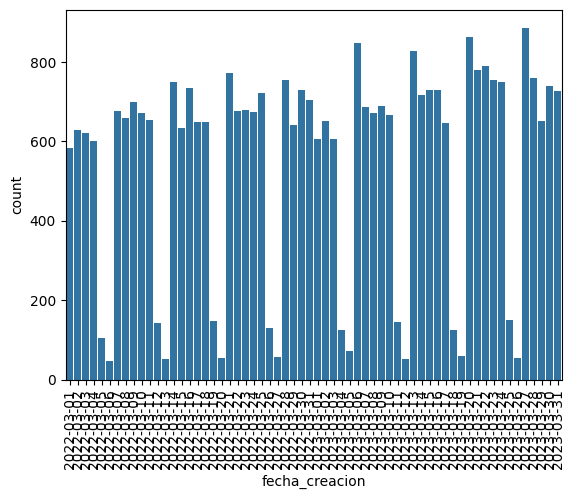

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['month']==3].groupby(['fecha_creacion']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='fecha_creacion', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\4170500267.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '2022-05-01'),
 Text(1, 0, '2022-05-02'),
 Text(2, 0, '2022-05-03'),
 Text(3, 0, '2022-05-04'),
 Text(4, 0, '2022-05-05'),
 Text(5, 0, '2022-05-06'),
 Text(6, 0, '2022-05-07'),
 Text(7, 0, '2022-05-08'),
 Text(8, 0, '2022-05-09'),
 Text(9, 0, '2022-05-10'),
 Text(10, 0, '2022-05-11'),
 Text(11, 0, '2022-05-12'),
 Text(12, 0, '2022-05-13'),
 Text(13, 0, '2022-05-14'),
 Text(14, 0, '2022-05-15'),
 Text(15, 0, '2022-05-16'),
 Text(16, 0, '2022-05-17'),
 Text(17, 0, '2022-05-18'),
 Text(18, 0, '2022-05-19'),
 Text(19, 0, '2022-05-20'),
 Text(20, 0, '2022-05-21'),
 Text(21, 0, '2022-05-22'),
 Text(22, 0, '2022-05-23'),
 Text(23, 0, '2022-05-24'),
 Text(24, 0, '2022-05-25'),
 Text(25, 0, '2022-05-26'),
 Text(26, 0, '2022-05-27'),
 Text(27, 0, '2022-05-28'),
 Text(28, 0, '2022-05-29'),
 Text(29, 0, '2022-05-30'),
 Text(30, 0, '2022-05-31'),
 Text(31, 0, '2023-05-01'),
 Text(32, 0, '2023-05-02'),
 Text(33, 0, '2023-05-03'),
 Text(34, 0, '2023-05-04'),
 Text(35, 0, '2023-05-05'),
 T

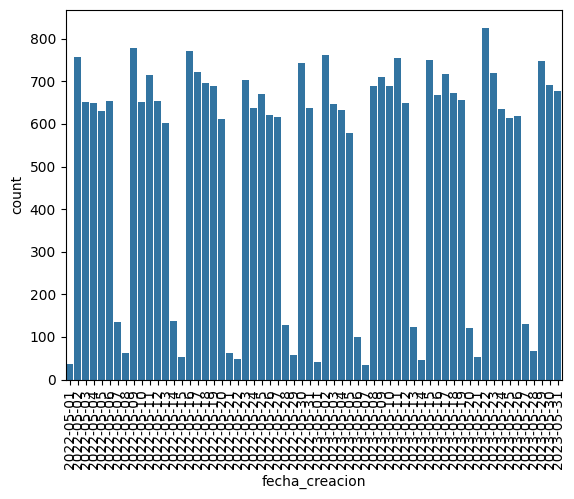

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['month']==5].groupby(['fecha_creacion']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='fecha_creacion', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\1896108520.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '2022-11-01'),
 Text(1, 0, '2022-11-02'),
 Text(2, 0, '2022-11-03'),
 Text(3, 0, '2022-11-04'),
 Text(4, 0, '2022-11-05'),
 Text(5, 0, '2022-11-06'),
 Text(6, 0, '2022-11-07'),
 Text(7, 0, '2022-11-08'),
 Text(8, 0, '2022-11-09'),
 Text(9, 0, '2022-11-10'),
 Text(10, 0, '2022-11-11'),
 Text(11, 0, '2022-11-12'),
 Text(12, 0, '2022-11-13'),
 Text(13, 0, '2022-11-14'),
 Text(14, 0, '2022-11-15'),
 Text(15, 0, '2022-11-16'),
 Text(16, 0, '2022-11-17'),
 Text(17, 0, '2022-11-18'),
 Text(18, 0, '2022-11-19'),
 Text(19, 0, '2022-11-20'),
 Text(20, 0, '2022-11-21'),
 Text(21, 0, '2022-11-22'),
 Text(22, 0, '2022-11-23'),
 Text(23, 0, '2022-11-24'),
 Text(24, 0, '2022-11-25'),
 Text(25, 0, '2022-11-26'),
 Text(26, 0, '2022-11-27'),
 Text(27, 0, '2022-11-28'),
 Text(28, 0, '2022-11-29'),
 Text(29, 0, '2022-11-30'),
 Text(30, 0, '2023-11-01'),
 Text(31, 0, '2023-11-02'),
 Text(32, 0, '2023-11-03'),
 Text(33, 0, '2023-11-04'),
 Text(34, 0, '2023-11-05'),
 Text(35, 0, '2023-11-06'),
 T

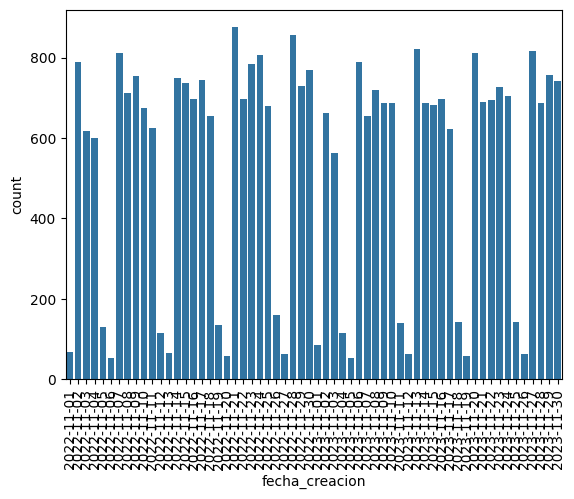

In [ ]:
graf_2 = df_mecanismos_time[df_mecanismos_time['month']==11].groupby(['fecha_creacion']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='fecha_creacion', data= graf_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

¿Hay relacion entre los dias de la semana y el tipo de acciente?

### Etario 

¿Que realcion hay entra la edad y el tipo de accidente?

Caidas

C:\Users\DELL\AppData\Local\Temp\ipykernel_22908\2349375228.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '0.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '2.0'),
 Text(3, 0, '3.0'),
 Text(4, 0, '4.0'),
 Text(5, 0, '5.0'),
 Text(6, 0, '10.0'),
 Text(7, 0, '17.0'),
 Text(8, 0, '18.0'),
 Text(9, 0, '19.0'),
 Text(10, 0, '20.0'),
 Text(11, 0, '21.0'),
 Text(12, 0, '22.0'),
 Text(13, 0, '23.0'),
 Text(14, 0, '24.0'),
 Text(15, 0, '25.0'),
 Text(16, 0, '26.0'),
 Text(17, 0, '27.0'),
 Text(18, 0, '28.0'),
 Text(19, 0, '29.0'),
 Text(20, 0, '30.0'),
 Text(21, 0, '31.0'),
 Text(22, 0, '32.0'),
 Text(23, 0, '33.0'),
 Text(24, 0, '34.0'),
 Text(25, 0, '35.0'),
 Text(26, 0, '36.0'),
 Text(27, 0, '37.0'),
 Text(28, 0, '38.0'),
 Text(29, 0, '39.0'),
 Text(30, 0, '40.0'),
 Text(31, 0, '41.0'),
 Text(32, 0, '42.0'),
 Text(33, 0, '43.0'),
 Text(34, 0, '44.0'),
 Text(35, 0, '45.0'),
 Text(36, 0, '46.0'),
 Text(37, 0, '47.0'),
 Text(38, 0, '48.0'),
 Text(39, 0, '49.0'),
 Text(40, 0, '50.0'),
 Text(41, 0, '51.0'),
 Text(42, 0, '52.0'),
 Text(43, 0, '53.0'),
 Text(44, 0, '54.0'),
 Text(45, 0, '55.0'),
 Tex

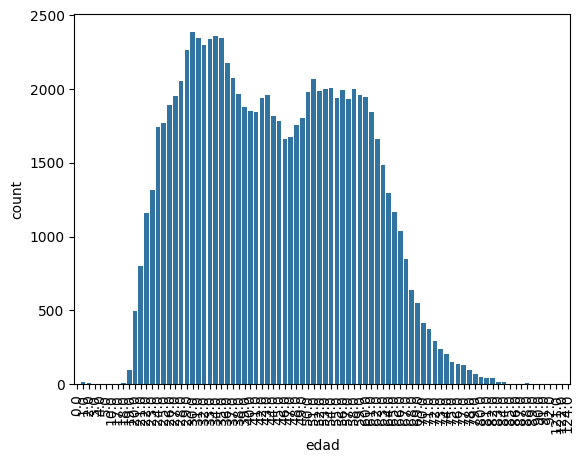

In [77]:
df_cai = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CAIDAS'].groupby(['edad']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='edad', data= df_cai)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)



In [78]:
df_cai = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CAIDAS'].groupby([['edad','sexo']])

#ax= sns.histplot(data=df_colum_year, x= 'month', hue="sexo")

ValueError: Grouper and axis must be same length

C:\Users\DELL\AppData\Local\Temp\ipykernel_8792\11328536.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '1.0'),
 Text(1, 0, '2.0'),
 Text(2, 0, '4.0'),
 Text(3, 0, '7.0'),
 Text(4, 0, '11.0'),
 Text(5, 0, '17.0'),
 Text(6, 0, '18.0'),
 Text(7, 0, '19.0'),
 Text(8, 0, '20.0'),
 Text(9, 0, '21.0'),
 Text(10, 0, '22.0'),
 Text(11, 0, '23.0'),
 Text(12, 0, '24.0'),
 Text(13, 0, '25.0'),
 Text(14, 0, '26.0'),
 Text(15, 0, '27.0'),
 Text(16, 0, '28.0'),
 Text(17, 0, '29.0'),
 Text(18, 0, '30.0'),
 Text(19, 0, '31.0'),
 Text(20, 0, '32.0'),
 Text(21, 0, '33.0'),
 Text(22, 0, '34.0'),
 Text(23, 0, '35.0'),
 Text(24, 0, '36.0'),
 Text(25, 0, '37.0'),
 Text(26, 0, '38.0'),
 Text(27, 0, '39.0'),
 Text(28, 0, '40.0'),
 Text(29, 0, '41.0'),
 Text(30, 0, '42.0'),
 Text(31, 0, '43.0'),
 Text(32, 0, '44.0'),
 Text(33, 0, '45.0'),
 Text(34, 0, '46.0'),
 Text(35, 0, '47.0'),
 Text(36, 0, '48.0'),
 Text(37, 0, '49.0'),
 Text(38, 0, '50.0'),
 Text(39, 0, '51.0'),
 Text(40, 0, '52.0'),
 Text(41, 0, '53.0'),
 Text(42, 0, '54.0'),
 Text(43, 0, '55.0'),
 Text(44, 0, '56.0'),
 Text(45, 0, '57.0'),
 T

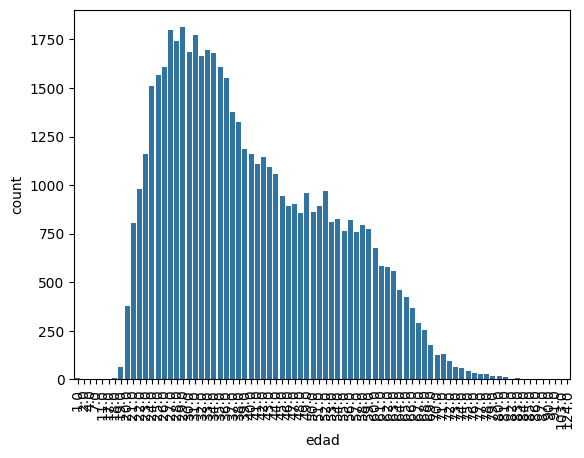

In [ ]:
df_cai = df_mecanismos_time[df_mecanismos_time['desc_subforma']=='CONTACTO CON OBJETOS CORTO-PUNZANTES'].groupby(['edad']).size().reset_index(name='count')
ax= sns.barplot(y='count', x='edad', data= df_cai)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Entre los 5 mecanismos mas frecuentes ¿Que edades son las frecuentes?

## Mujeres

C:\Users\DELL\AppData\Local\Temp\ipykernel_22908\284273134.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'EXPLOSIONES O INCENDIOS'),
 Text(1, 0, 'INTOXICACION ALIMENTARIA'),
 Text(2, 0, 'FUERZA EXCESIVA'),
 Text(3, 0, 'PROYECCION DE PARTICULAS'),
 Text(4, 0, 'CONTACTO CON CORRIENTE ELECTRICA'),
 Text(5, 0, 'INCIDENTE SIN LESION SEGUN RELATO PACIENTE'),
 Text(6, 0, 'AGRESIONES DE ANIMALES'),
 Text(7, 0, 'PICADURAS DE INSECTOS'),
 Text(8, 0, 'PISADAS'),
 Text(9, 0, 'CONTACTO CON CALOR O FRIO EXTREMO'),
 Text(10, 0, 'CONTACTO O INHALACION DE SUSTANCIAS QUIMICAS, BIOLOGICAS O RADIACIONES '),
 Text(11, 0, 'ATRAPAMIENTOS'),
 Text(12, 0, 'FALSOS MOVIMIENTOS Y SOBREESFUERZO'),
 Text(13, 0, 'AMENZAS O AGRESIONES DE PERSONAS'),
 Text(14, 0, 'OTRAS FORMAS DE ACCIDENTE'),
 Text(15, 0, 'CONTACTO CON OBJETOS CORTO-PUNZANTES'),
 Text(16, 0, 'ACCIDENTES QUE INVOLUCRAN VEHICULOS'),
 Text(17, 0, 'GOLPES'),
 Text(18, 0, 'CAIDAS')]

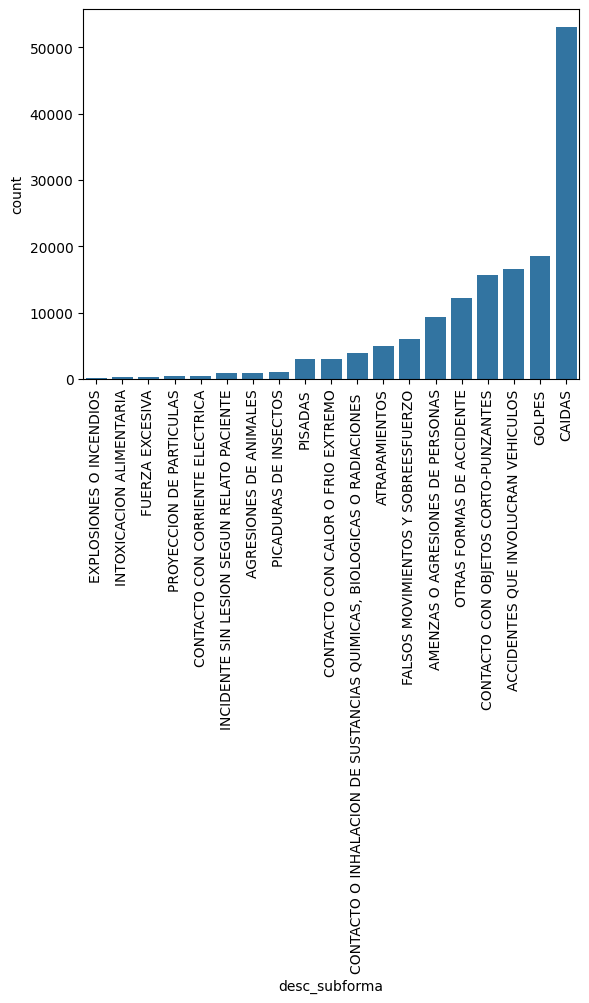

In [79]:
graf_3 = df_mecanismos[df_mecanismos['sexo']=='femenino'].groupby(['desc_subforma']).size().reset_index(name='count').sort_values('count')

ax= sns.barplot(y='count', x='desc_subforma', data= graf_3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


## Hombres

C:\Users\DELL\AppData\Local\Temp\ipykernel_22908\344687076.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'INTOXICACION ALIMENTARIA'),
 Text(1, 0, 'EXPLOSIONES O INCENDIOS'),
 Text(2, 0, 'INCIDENTE SIN LESION SEGUN RELATO PACIENTE'),
 Text(3, 0, 'FUERZA EXCESIVA'),
 Text(4, 0, 'CONTACTO CON CORRIENTE ELECTRICA'),
 Text(5, 0, 'PICADURAS DE INSECTOS'),
 Text(6, 0, 'AGRESIONES DE ANIMALES'),
 Text(7, 0, 'CONTACTO CON CALOR O FRIO EXTREMO'),
 Text(8, 0, 'PISADAS'),
 Text(9, 0, 'PROYECCION DE PARTICULAS'),
 Text(10, 0, 'CONTACTO O INHALACION DE SUSTANCIAS QUIMICAS, BIOLOGICAS O RADIACIONES '),
 Text(11, 0, 'FALSOS MOVIMIENTOS Y SOBREESFUERZO'),
 Text(12, 0, 'AMENZAS O AGRESIONES DE PERSONAS'),
 Text(13, 0, 'ATRAPAMIENTOS'),
 Text(14, 0, 'OTRAS FORMAS DE ACCIDENTE'),
 Text(15, 0, 'ACCIDENTES QUE INVOLUCRAN VEHICULOS'),
 Text(16, 0, 'GOLPES'),
 Text(17, 0, 'CONTACTO CON OBJETOS CORTO-PUNZANTES'),
 Text(18, 0, 'CAIDAS')]

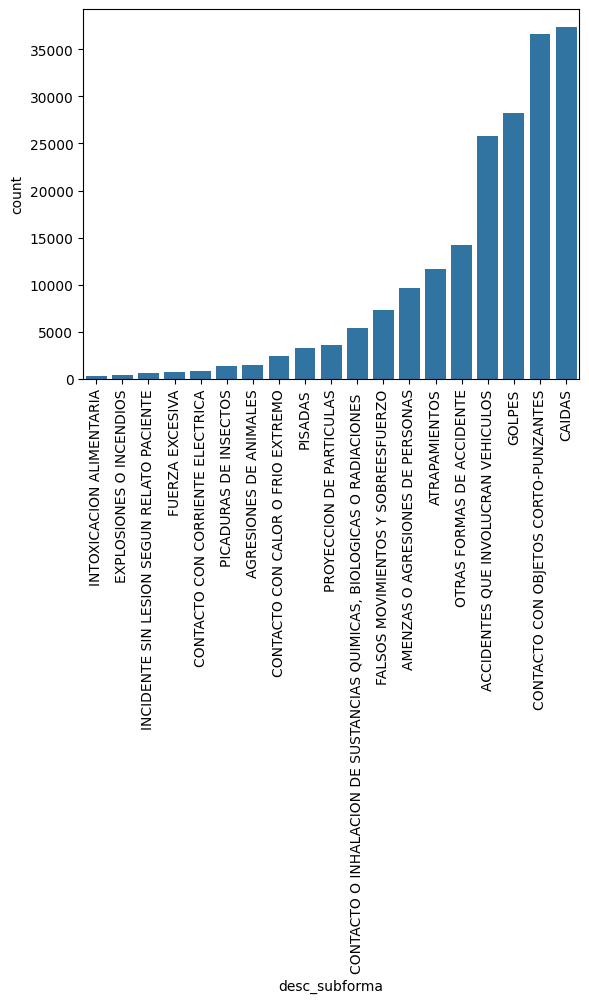

In [81]:
graf_4 = df_mecanismos[df_mecanismos['sexo']=='masculino'].groupby(['desc_subforma']).size().reset_index(name='count').sort_values('count')
ax= sns.barplot(y='count', x='desc_subforma', data= graf_4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)